Chapter 29
# 把瑞利商看成是二元函数
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex, simplify,symbols

from matplotlib import cm
# 导入色谱模块

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = False
p["xtick.minor.visible"] = False
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5


In [3]:
def mesh(num = 100):
    # 偶数避免零点
    
    # number of mesh grids
    x_array = np.linspace(-2,2,num)
    y_array = np.linspace(-2,2,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

In [4]:
x1, x2 = symbols('x1 x2')
# 自定义函数计算二元瑞利商
def Rayleigh_Q(Q, xx1, xx2):
    
    x = np.array([[x1],
                  [x2]])
    
    # 瑞利商，符号式
    f_x1x2 = x.T @ Q @ x/(x.T @ x)
    
    # 将符号函数表达式转换为Python函数
    f_x1x2_fcn = lambdify([x1,x2],f_x1x2[0][0])
    
    # 计算二元函数函数值
    ff = f_x1x2_fcn(xx1, xx2)
    
    return ff,simplify(f_x1x2[0][0])


In [5]:
def visualize(Q, title):
    
    xx1, xx2 = mesh(num = 200)
    ff,f_x1x2 = Rayleigh_Q(Q, xx1, xx2)
    
    levels = np.linspace(-2,2,41)
    
    # 特征值分解
    _,V = np.linalg.eig(Q)
    v1 = V[:,0]
    v2 = V[:,1]
    
    ### 单位圆坐标
    theta_array = np.linspace(0, 2*np.pi, 100)
    x1_circle = np.cos(theta_array)
    x2_circle = np.sin(theta_array)

    fig = plt.figure(figsize=(8,4))
    
    ax = fig.add_subplot(1, 2, 1)
    ax.contourf(xx1, xx2, ff, 
                levels = levels, cmap='RdYlBu_r')
    ax.plot(x1_circle, x2_circle, color = 'k')
    # 绘制向量 v1
    ax.quiver(0, 0, v1[0], v1[1], 
              angles='xy', scale_units='xy', scale=1, 
              color = 'k')
    
    # 绘制向量 v2
    ax.quiver(0, 0, v2[0], v2[1], 
              angles='xy', scale_units='xy', scale=1, 
              color = 'k')
    
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')

    ax.plot_wireframe(xx1, xx2, ff,
                      color = [0.5,0.5,0.5],
                      rstride=10, cstride=10,
                      linewidth = 0.25)

    CS = ax.contour(xx1, xx2, ff,
               cmap = 'RdYlBu_r', levels = levels)
    fig.colorbar(CS, ax=ax, shrink=0.8)
    f_circle, _ = Rayleigh_Q(Q, x1_circle, x2_circle)
    ax.plot(x1_circle, x2_circle, f_circle, color = 'k')

    ax.set_proj_type('ortho')

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    # ax.set_zlabel('$f(x_1,x_2)$')

    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_zticks([])
    # ax.view_init(azim=-120, elev=30)
    ax.view_init(azim=-120, elev=60)
    plt.tight_layout()
    ax.grid(False)
    
    fig.savefig('Figures/' + title + '.svg', format='svg')
    
    return f_x1x2

(array([1., 2.]), array([[1., 0.],
       [0., 1.]]))


(x1**2 + 2*x2**2)/(x1**2 + x2**2)

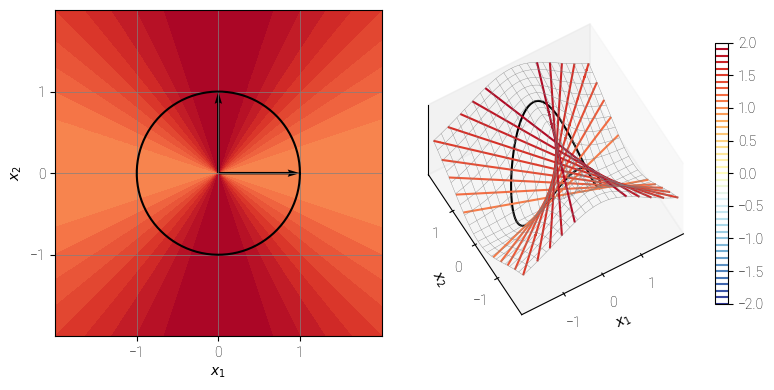

In [6]:
Q = np.array([[1,0],
              [0,2]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '开口朝上正椭圆面')
f_x1x2

(array([2., 1.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


1.0*(1.5*x1**2 + 1.0*x1*x2 + 1.5*x2**2)/(x1**2 + x2**2)

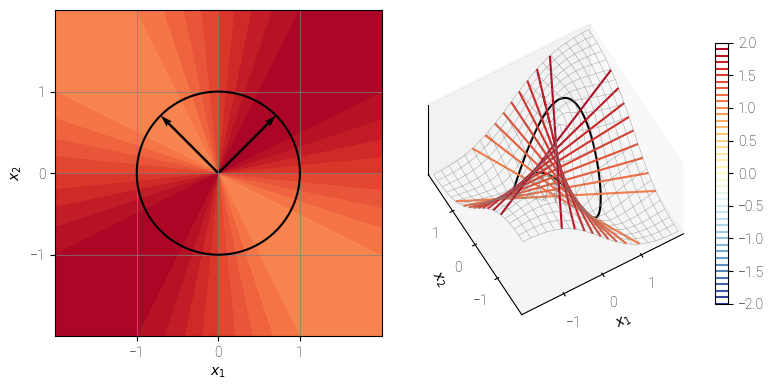

In [7]:
Q = np.array([[1.5,0.5],
              [0.5,1.5]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '开口朝上旋转椭圆面')
f_x1x2

(array([-1., -2.]), array([[1., 0.],
       [0., 1.]]))


(-x1**2 - 2*x2**2)/(x1**2 + x2**2)

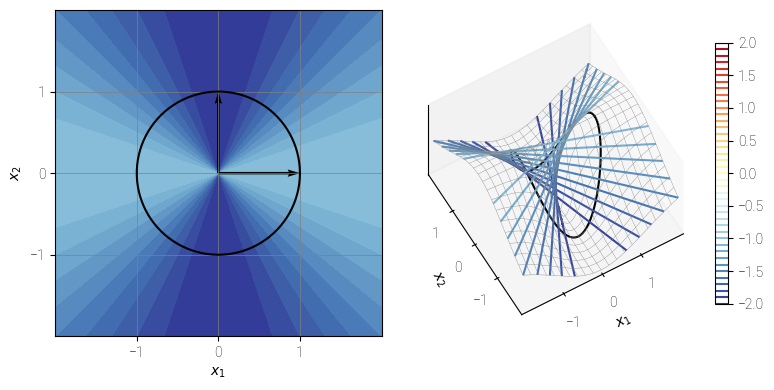

In [8]:
Q = np.array([[-1,0],
              [0,-2]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '开口朝下正椭圆面')
f_x1x2

(array([-1., -2.]), array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))


1.0*(-1.5*x1**2 - 1.0*x1*x2 - 1.5*x2**2)/(x1**2 + x2**2)

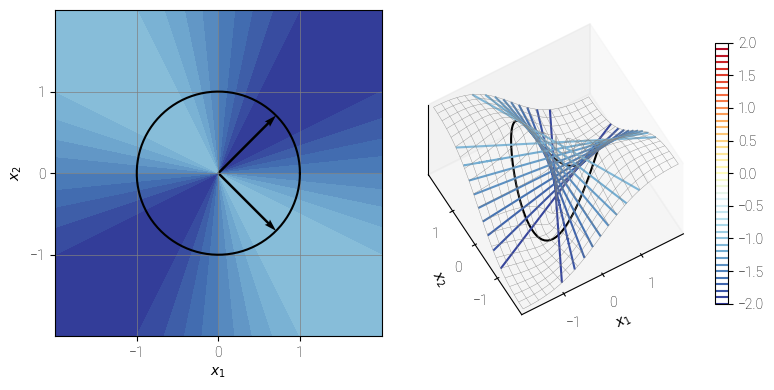

In [9]:
Q = np.array([[-1.5,-0.5],
              [-0.5,-1.5]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '开口朝下旋转椭圆面')
f_x1x2

(array([2., 0.]), array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))


(x1 - x2)**2/(x1**2 + x2**2)

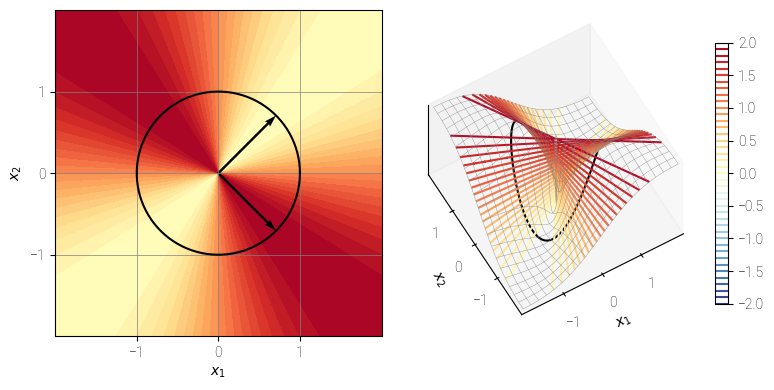

In [10]:
Q = np.array([[1,-1],
              [-1,1]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '旋转山谷')
f_x1x2

(array([ 0., -2.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


-(x1 - x2)**2/(x1**2 + x2**2)

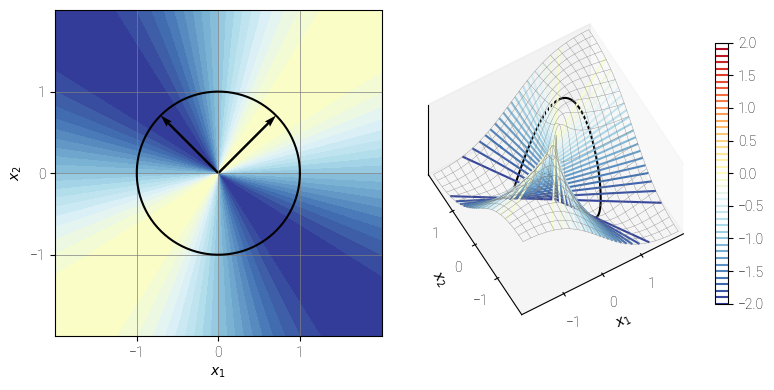

In [11]:
Q = np.array([[-1,1],
              [1,-1]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '旋转山脊')
f_x1x2

(array([ 1., -1.]), array([[1., 0.],
       [0., 1.]]))


(x1**2 - x2**2)/(x1**2 + x2**2)

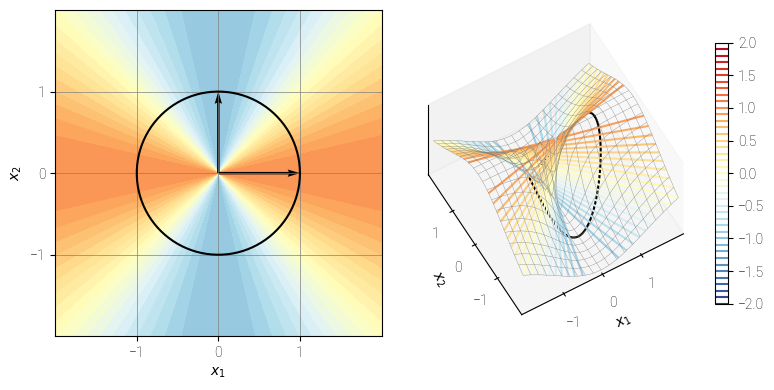

In [12]:
Q = np.array([[1,0],
              [0,-1]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '双曲面')
f_x1x2

(array([ 2., -2.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


4*x1*x2/(x1**2 + x2**2)

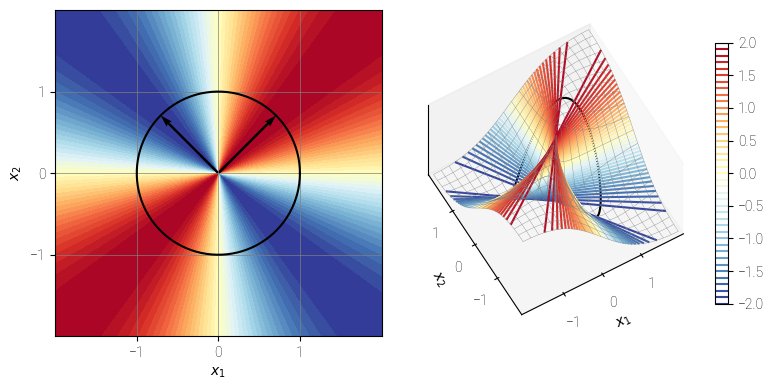

In [13]:
Q = np.array([[0,2],
              [2,0]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '旋转双曲面')
f_x1x2